# Explore here

In [99]:
# Your code here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# modelado
from sklearn.model_selection import train_test_split

# escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# selecicon
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.exceptions import NotFittedError


# modelado
from sklearn.linear_model import LogisticRegression

# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=";")
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [100]:
# BUSCAMOS INFORMACION DEL DATASET
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [101]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [102]:
duplicados1 = df[df.duplicated()]
print(duplicados1)

       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    uni

In [103]:
duplicados = df.duplicated()
numeros_duplicados = duplicados.sum()
print(f"LOS NUMEROS DUPLICADOS EN EL DATASET SON {numeros_duplicados}")

LOS NUMEROS DUPLICADOS EN EL DATASET SON 12


In [104]:
# ELIMINAMOS LO NUMEROS DUPLICADOS
df_sin_duplicados = df.drop_duplicates()
df_sin_duplicados.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [105]:
df_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [106]:
# CONTAMOS CUANTOS NaN EXISTEN POR COLUMNAS PARA SABER DONDE DEBEMOS REEMPLAZARLAS
nan_counts = df.isnull().sum() 
print("CONTEO DE LOS 'NaN' POR COLUMNAS:") 
nan_counts

CONTEO DE LOS 'NaN' POR COLUMNAS:


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [107]:
# ELIMINAMOS LAS COLUMNAS QUE SE CONSIDERAN NO RELACIONADAS CON LA NECESIDAD
df_sin_duplicados.drop(["marital", "contact", "month", "day_of_week", "campaign", "pdays", "previous", "cons.price.idx","cons.conf.idx", "nr.employed"], axis = 1, inplace = True)
df_sin_duplicados.head()

,age,job,education,default,housing,loan,duration,poutcome,emp.var.rate,euribor3m,y
0,56,housemaid,basic.4y,no,no,no,261,nonexistent,1.1,4.857,no
1,57,services,high.school,unknown,no,no,149,nonexistent,1.1,4.857,no
2,37,services,high.school,no,yes,no,226,nonexistent,1.1,4.857,no
3,40,admin.,basic.6y,no,no,no,151,nonexistent,1.1,4.857,no
4,56,services,high.school,no,no,yes,307,nonexistent,1.1,4.857,no


---------------ANALISIS UNIVARIANTE------------------
ANALISIS UNIVARIANTE CATEGORICAS


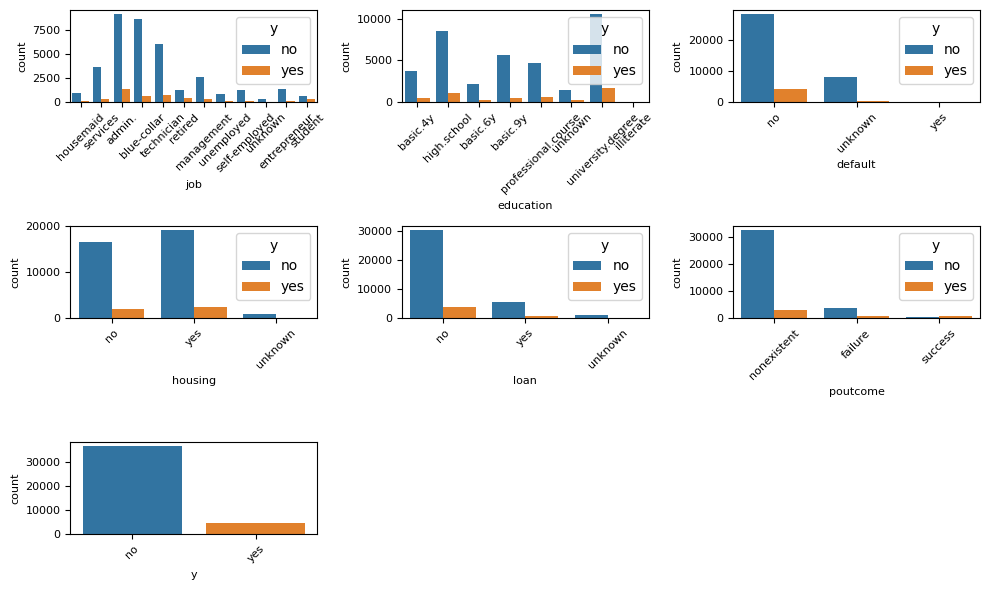

In [108]:
print("---------------ANALISIS UNIVARIANTE------------------\nANALISIS UNIVARIANTE CATEGORICAS")

df_sin_duplicados.job.value_counts()
df_sin_duplicados.education.value_counts()
df_sin_duplicados.default.value_counts()
df_sin_duplicados.housing.value_counts()
df_sin_duplicados.loan.value_counts()
df_sin_duplicados.poutcome.value_counts()
df_sin_duplicados.y.value_counts()
fig, axis = plt.subplots(3, 3, figsize = (10, 6))
sns.countplot(ax = axis[0, 0], data = df_sin_duplicados, x = "job", hue = "y")
sns.countplot(ax = axis[0, 1], data = df_sin_duplicados, x = "education", hue = "y")
sns.countplot(ax = axis[0, 2], data = df_sin_duplicados, x = "default", hue = "y")
sns.countplot(ax = axis[1, 0], data = df_sin_duplicados, x = "housing", hue = "y")
sns.countplot(ax = axis[1, 1], data = df_sin_duplicados, x = "loan", hue = "y")
sns.countplot(ax = axis[1, 2], data = df_sin_duplicados, x = "poutcome", hue = "y")
sns.countplot(ax = axis[2, 0], data = df_sin_duplicados, x = "y", hue = "y")
for ax in axis.flatten(): 
    if ax is not None: 
        ax.set_xlabel(ax.get_xlabel(), fontsize=8) 
        ax.set_ylabel(ax.get_ylabel(), fontsize=8) 
        ax.set_title(ax.get_title(), fontsize=8) 
        ax.tick_params(axis='x', rotation=45, labelsize=8) 
        ax.tick_params(axis='y', labelsize=8)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[2, 2])
plt.tight_layout()

plt.show()



ANALISIS UNIVARIANTE DE NUMERICAS


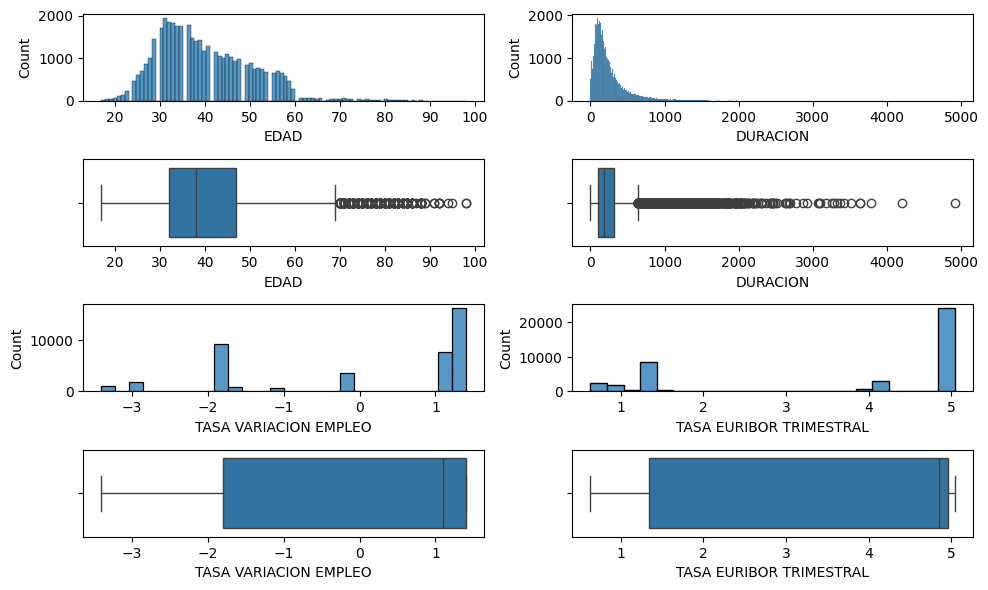

In [109]:
print("ANALISIS UNIVARIANTE DE NUMERICAS")
fig, axis = plt.subplots(4, 2, figsize = (10, 6))

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df_sin_duplicados, x = "age").set(xlabel = "EDAD")
sns.boxplot(ax = axis[1, 0], data = df_sin_duplicados, x = "age").set(xlabel = "EDAD")

sns.histplot(ax = axis[0, 1], data = df_sin_duplicados, x = "duration").set(xlabel = "DURACION")
sns.boxplot(ax = axis[1, 1], data = df_sin_duplicados, x = "duration").set(xlabel= "DURACION")

sns.histplot(ax = axis[2, 0], data = df_sin_duplicados, x = "emp.var.rate").set(xlabel = "TASA VARIACION EMPLEO")
sns.boxplot(ax = axis[3, 0], data = df_sin_duplicados, x = "emp.var.rate").set(xlabel="TASA VARIACION EMPLEO")

sns.histplot(ax = axis[2, 1], data = df_sin_duplicados, x = "euribor3m").set(xlabel = "TASA EURIBOR TRIMESTRAL")
sns.boxplot(ax = axis[3, 1], data = df_sin_duplicados, x = "euribor3m").set(xlabel= "TASA EURIBOR TRIMESTRAL")



# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [110]:
df_sin_duplicados["y_fact"] = pd.factorize(df_sin_duplicados["y"])[0]
df_sin_duplicados["job_fact"] = pd.factorize(df_sin_duplicados["job"])[0]
df_sin_duplicados["education_fact"] = pd.factorize(df_sin_duplicados["education"])[0]
df_sin_duplicados['poutcome_fact'] = pd.factorize(df_sin_duplicados["poutcome"])[0]
df_sin_duplicados['default_fact'] = pd.factorize(df_sin_duplicados["default"])[0]
df_sin_duplicados['housing_fact'] = pd.factorize(df_sin_duplicados["housing"])[0]
df_sin_duplicados['loan_fact'] = pd.factorize(df_sin_duplicados["loan"])[0]
df_sin_duplicados.head()

,age,job,education,default,housing,loan,duration,poutcome,emp.var.rate,euribor3m,y,y_fact,job_fact,education_fact,poutcome_fact,default_fact,housing_fact,loan_fact
0,56,housemaid,basic.4y,no,no,no,261,nonexistent,1.1,4.857,no,0,0,0,0,0,0,0
1,57,services,high.school,unknown,no,no,149,nonexistent,1.1,4.857,no,0,1,1,0,1,0,0
2,37,services,high.school,no,yes,no,226,nonexistent,1.1,4.857,no,0,1,1,0,0,1,0
3,40,admin.,basic.6y,no,no,no,151,nonexistent,1.1,4.857,no,0,2,2,0,0,0,0
4,56,services,high.school,no,no,yes,307,nonexistent,1.1,4.857,no,0,1,1,0,0,0,1


---------------ANALISIS MULTIVARIANTE------------------
ANALISIS NUMERICO-NUMERICO


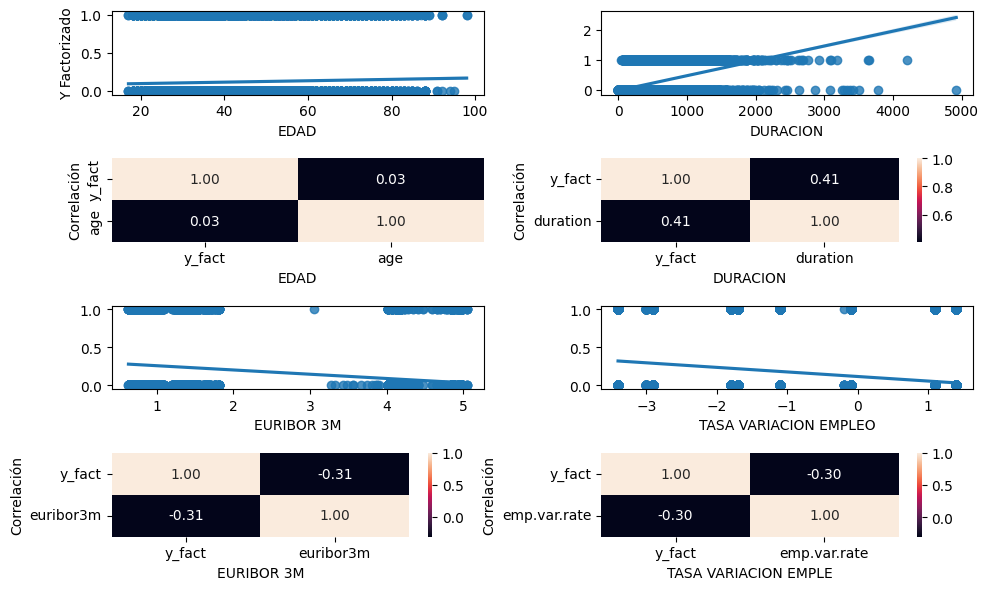

In [111]:
print("---------------ANALISIS MULTIVARIANTE------------------\nANALISIS NUMERICO-NUMERICO")
fig, axis = plt.subplots(4, 2, figsize=(10, 6))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax=axis[0, 0], data=df_sin_duplicados, x="age", y="y_fact")
axis[0, 0].set_xlabel("EDAD")
axis[0, 0].set_ylabel("Y Factorizado")

sns.heatmap(df_sin_duplicados[["y_fact", "age"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
axis[1, 0].set_xlabel("EDAD")
axis[1, 0].set_ylabel("Correlación")

sns.regplot(ax=axis[0, 1], data=df_sin_duplicados, x="duration", y="y_fact").set(ylabel=None)
axis[0, 1].set_xlabel("DURACION")

sns.heatmap(df_sin_duplicados[["y_fact", "duration"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])
axis[1, 1].set_xlabel("DURACION")
axis[1, 1].set_ylabel("Correlación")

sns.regplot(ax=axis[2, 0], data=df_sin_duplicados, x="euribor3m", y="y_fact").set(ylabel=None)
axis[2, 0].set_xlabel("EURIBOR 3M")

sns.heatmap(df_sin_duplicados[["y_fact", "euribor3m"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0])
axis[3, 0].set_xlabel("EURIBOR 3M")
axis[3, 0].set_ylabel("Correlación")

sns.regplot(ax=axis[2, 1], data=df_sin_duplicados, x="emp.var.rate", y="y_fact").set(ylabel=None)
axis[2, 1].set_xlabel("TASA VARIACION EMPLEO")

sns.heatmap(df_sin_duplicados[["y_fact", "emp.var.rate"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1])
axis[3, 1].set_xlabel("TASA VARIACION EMPLE")
axis[3, 1].set_ylabel("Correlación")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


In [112]:
df_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   education       41176 non-null  object 
 3   default         41176 non-null  object 
 4   housing         41176 non-null  object 
 5   loan            41176 non-null  object 
 6   duration        41176 non-null  int64  
 7   poutcome        41176 non-null  object 
 8   emp.var.rate    41176 non-null  float64
 9   euribor3m       41176 non-null  float64
 10  y               41176 non-null  object 
 11  y_fact          41176 non-null  int64  
 12  job_fact        41176 non-null  int64  
 13  education_fact  41176 non-null  int64  
 14  poutcome_fact   41176 non-null  int64  
 15  default_fact    41176 non-null  int64  
 16  housing_fact    41176 non-null  int64  
 17  loan_fact       41176 non-null  int6

In [113]:
df_sin_duplicados

,age,job,education,default,housing,loan,duration,poutcome,emp.var.rate,euribor3m,y,y_fact,job_fact,education_fact,poutcome_fact,default_fact,housing_fact,loan_fact
0,56,housemaid,basic.4y,no,no,no,261,nonexistent,1.1,4.857,no,0,0,0,0,0,0,0
1,57,services,high.school,unknown,no,no,149,nonexistent,1.1,4.857,no,0,1,1,0,1,0,0
2,37,services,high.school,no,yes,no,226,nonexistent,1.1,4.857,no,0,1,1,0,0,1,0
3,40,admin.,basic.6y,no,no,no,151,nonexistent,1.1,4.857,no,0,2,2,0,0,0,0
4,56,services,high.school,no,no,yes,307,nonexistent,1.1,4.857,no,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,professional.course,no,yes,no,334,nonexistent,-1.1,1.028,yes,1,5,4,0,0,1,0
41184,46,blue-collar,professional.course,no,no,no,383,nonexistent,-1.1,1.028,no,0,3,4,0,0,0,0
41185,56,retired,university.degree,no,yes,no,189,nonexistent,-1.1,1.028,no,0,5,6,0,0,1,0
41186,44,technician,professional.course,no,no,no,442,nonexistent,-1.1,1.028,yes,1,4,4,0,0,0,0


-----------------ANALISIS NUMERICO - CATEGORICO (ANALISIS COMPLETO)
CORRELACION DE TODAS LAS VARABLES


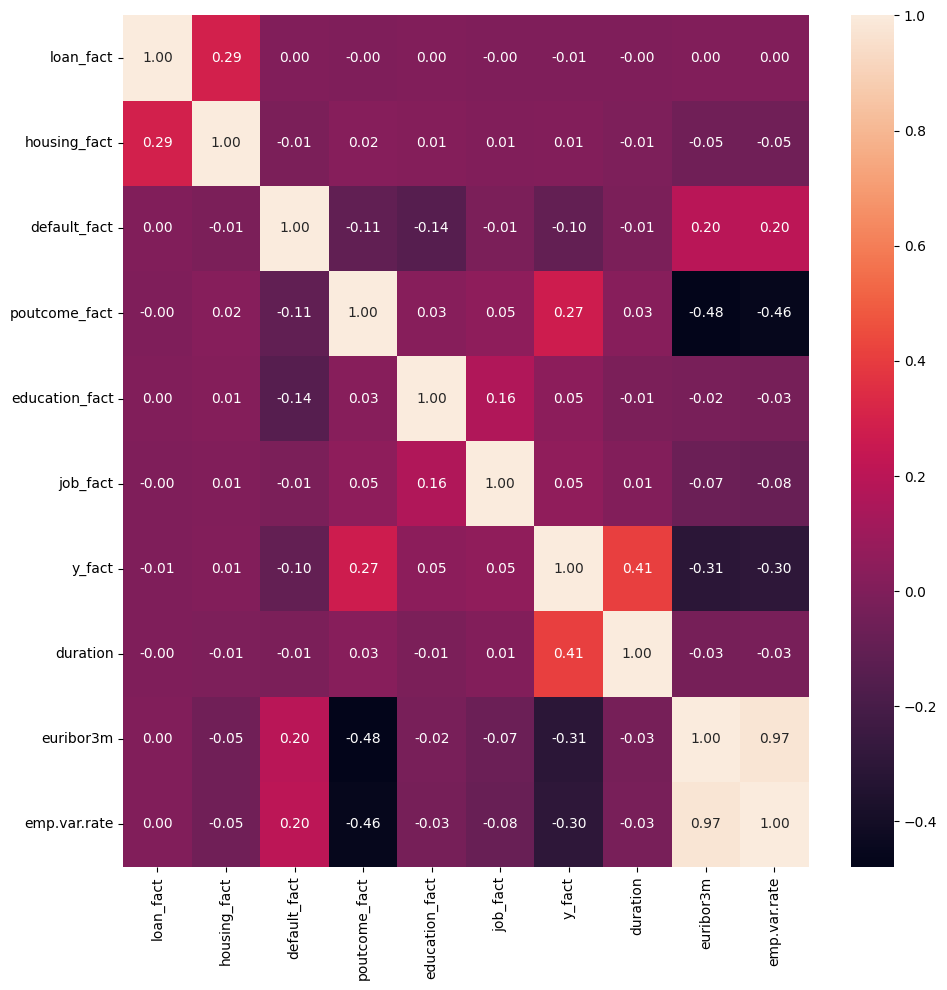

In [114]:
print("-----------------ANALISIS NUMERICO - CATEGORICO (ANALISIS COMPLETO)\nCORRELACION DE TODAS LAS VARABLES")
fig, axis = plt.subplots(figsize = (10, 10))

sns.heatmap(df_sin_duplicados[["loan_fact", "housing_fact", "default_fact", "poutcome_fact", "education_fact", "job_fact", "y_fact", "duration","euribor3m","emp.var.rate"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

----------------VALORES ATIPICOS-----------------



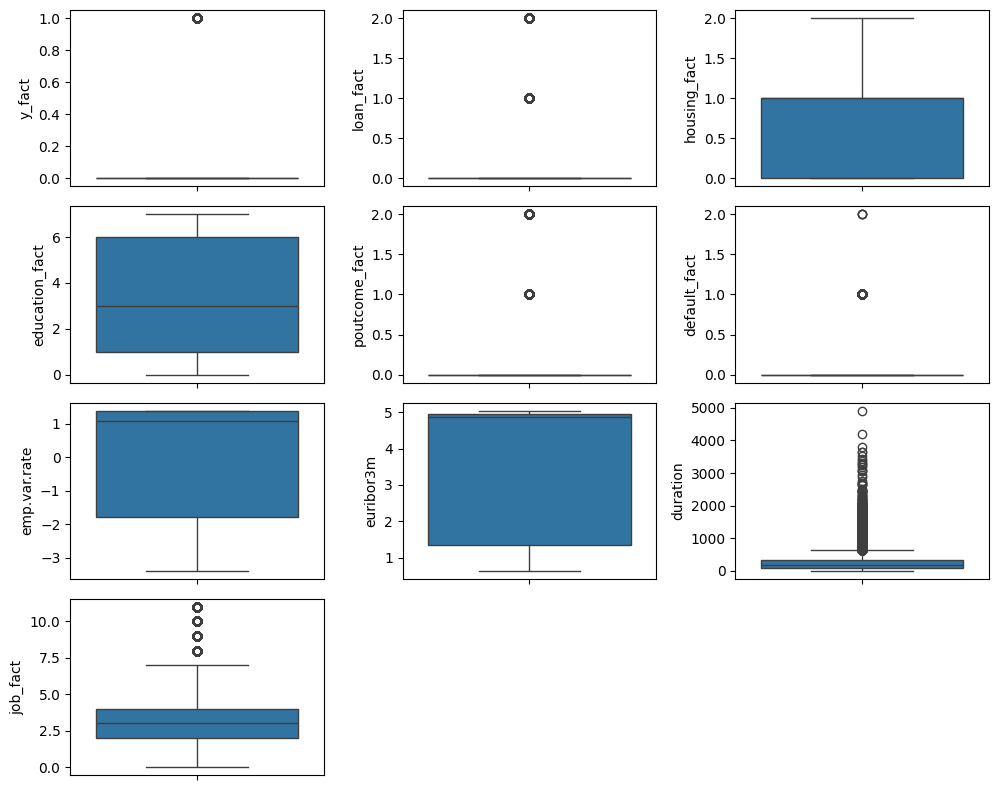

In [115]:
print("----------------VALORES ATIPICOS-----------------\n")
fig, axis = plt.subplots(4, 3, figsize = (10, 8))

sns.boxplot(ax = axis[0, 0], data = df_sin_duplicados, y = "y_fact")
sns.boxplot(ax = axis[0, 1], data = df_sin_duplicados, y = "loan_fact")
sns.boxplot(ax = axis[0, 2], data = df_sin_duplicados, y = "housing_fact")
sns.boxplot(ax = axis[1, 0], data = df_sin_duplicados, y = "education_fact")
sns.boxplot(ax = axis[1, 1], data = df_sin_duplicados, y = "poutcome_fact")
sns.boxplot(ax = axis[1, 2], data = df_sin_duplicados, y = "default_fact")
sns.boxplot(ax = axis[2, 0], data = df_sin_duplicados, y = "emp.var.rate")
sns.boxplot(ax = axis[2, 1], data = df_sin_duplicados, y = "euribor3m")
sns.boxplot(ax = axis[2, 2], data = df_sin_duplicados, y = "duration")
sns.boxplot(ax = axis[3, 0], data = df_sin_duplicados, y = "job_fact")
fig.delaxes(axis[3, 1])
fig.delaxes(axis[3, 2])
plt.tight_layout()

plt.show()

In [116]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df_sin_duplicados['duration'].quantile(0.25)
Q3 = df_sin_duplicados['duration'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 644.5 y -223.5, con un rango intercuartílico de 217.0


In [117]:
duracion_atipica = df_sin_duplicados[df_sin_duplicados["duration"] >= upper_limit]
duracion_atipica


,age,job,education,default,housing,loan,duration,poutcome,emp.var.rate,euribor3m,y,y_fact,job_fact,education_fact,poutcome_fact,default_fact,housing_fact,loan_fact
37,52,technician,basic.9y,no,yes,no,1666,nonexistent,1.1,4.857,no,0,4,3,0,0,1,0
57,45,services,high.school,unknown,yes,no,787,nonexistent,1.1,4.857,no,0,1,1,0,1,1,0
61,51,blue-collar,basic.9y,no,yes,no,812,nonexistent,1.1,4.857,no,0,3,3,0,0,1,0
75,41,blue-collar,basic.4y,unknown,yes,no,1575,nonexistent,1.1,4.857,yes,1,3,0,0,1,1,0
83,49,entrepreneur,university.degree,unknown,yes,no,1042,nonexistent,1.1,4.857,yes,1,10,6,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41147,25,technician,professional.course,no,yes,no,712,success,-1.1,1.040,yes,1,4,4,2,0,1,0
41153,67,housemaid,professional.course,no,yes,no,655,success,-1.1,1.039,yes,1,0,4,2,0,1,0
41160,33,admin.,university.degree,no,no,no,843,nonexistent,-1.1,1.035,yes,1,2,6,0,0,0,0
41164,54,admin.,professional.course,no,no,no,1868,success,-1.1,1.035,yes,1,2,4,2,0,0,0


In [118]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df_sin_duplicados['job_fact'].quantile(0.25)
Q3 = df_sin_duplicados['job_fact'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 7.0 y -1.0, con un rango intercuartílico de 2.0


In [119]:
trabajos_atipicos = df_sin_duplicados[df_sin_duplicados["job_fact"] >= upper_limit]
trabajos_atipicos

,age,job,education,default,housing,loan,duration,poutcome,emp.var.rate,euribor3m,y,y_fact,job_fact,education_fact,poutcome_fact,default_fact,housing_fact,loan_fact
20,30,unemployed,high.school,no,no,no,38,nonexistent,1.1,4.857,no,0,7,1,0,0,0,0
27,39,self-employed,basic.9y,unknown,no,no,233,nonexistent,1.1,4.857,no,0,8,3,0,1,0,0
29,55,unknown,university.degree,unknown,unknown,unknown,362,nonexistent,1.1,4.857,no,0,9,6,0,1,2,2
35,55,unknown,basic.4y,unknown,yes,no,336,nonexistent,1.1,4.857,no,0,9,0,0,1,1,0
41,32,entrepreneur,high.school,no,yes,no,314,nonexistent,1.1,4.857,no,0,10,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41138,58,unemployed,university.degree,no,yes,no,344,nonexistent,-1.1,1.041,yes,1,7,6,0,0,1,0
41168,38,entrepreneur,university.degree,no,no,no,144,nonexistent,-1.1,1.030,no,0,10,6,0,0,0,0
41171,33,student,professional.course,no,yes,no,112,nonexistent,-1.1,1.031,yes,1,11,4,0,0,1,0
41175,34,student,unknown,no,yes,no,180,failure,-1.1,1.031,no,0,11,5,1,0,1,0


In [120]:
df_sin_duplicados.drop(["y","job_fact","education_fact","default_fact","housing_fact","loan_fact","poutcome_fact"], axis = 1, inplace = True)
df_sin_duplicados

,age,job,education,default,housing,loan,duration,poutcome,emp.var.rate,euribor3m,y_fact
0,56,housemaid,basic.4y,no,no,no,261,nonexistent,1.1,4.857,0
1,57,services,high.school,unknown,no,no,149,nonexistent,1.1,4.857,0
2,37,services,high.school,no,yes,no,226,nonexistent,1.1,4.857,0
3,40,admin.,basic.6y,no,no,no,151,nonexistent,1.1,4.857,0
4,56,services,high.school,no,no,yes,307,nonexistent,1.1,4.857,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,professional.course,no,yes,no,334,nonexistent,-1.1,1.028,1
41184,46,blue-collar,professional.course,no,no,no,383,nonexistent,-1.1,1.028,0
41185,56,retired,university.degree,no,yes,no,189,nonexistent,-1.1,1.028,0
41186,44,technician,professional.course,no,no,no,442,nonexistent,-1.1,1.028,1


In [121]:
print("------------------DIVISION EN TRAIN Y TEST DE LOS DATOS--------------------------\n")
# Dividimos el conjunto de datos en muestras de train y test
X = df_sin_duplicados.drop("y_fact", axis = 1)
y = df_sin_duplicados["y_fact"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

------------------DIVISION EN TRAIN Y TEST DE LOS DATOS--------------------------



,age,job,education,default,housing,loan,duration,poutcome,emp.var.rate,euribor3m
12348,29,entrepreneur,basic.6y,no,yes,yes,286,nonexistent,1.4,4.959
8565,50,admin.,university.degree,no,no,no,178,nonexistent,1.4,4.864
21424,29,admin.,university.degree,no,no,no,103,nonexistent,1.4,4.963
3316,35,admin.,university.degree,no,no,no,135,nonexistent,1.1,4.860
33246,40,blue-collar,high.school,unknown,no,no,418,nonexistent,-1.8,1.291


In [122]:
# DEFINO LAS VARIABLES CATEGORICAS Y NUMERICAS
variables_categoricas = ['job','education','default','housing','loan','poutcome']
variables_numericas = ['age','duration','emp.var.rate','euribor3m']

In [123]:

X_train_cat_le = X_train.copy()
X_test_cat_le = X_test.copy()

print("-------------------CODIFICACION DE VARIABLES CATEGORICAS-------------------\nUTILIZO LABEL ENCODING") 
# instancio el encoder para cada variable categórica 
label_encoders = {} 
for var in variables_categoricas: 
    le = LabelEncoder() 
    X_train_cat_le[var + '_le'] = le.fit_transform(X_train[var]) 
    X_test_cat_le[var + '_le'] = le.transform(X_test[var]) 
    label_encoders[var] = le 
# Eliminar las columnas categóricas originales después de la codificación 
X_train_cat_le = X_train_cat_le.drop(columns=variables_categoricas) 
X_test_cat_le = X_test_cat_le.drop(columns=variables_categoricas) 
X_train_cat_le.head()

-------------------CODIFICACION DE VARIABLES CATEGORICAS-------------------
UTILIZO LABEL ENCODING


,age,duration,emp.var.rate,euribor3m,job_le,education_le,default_le,housing_le,loan_le,poutcome_le
12348,29,286,1.4,4.959,2,1,0,2,2,1
8565,50,178,1.4,4.864,0,6,0,0,0,1
21424,29,103,1.4,4.963,0,6,0,0,0,1
3316,35,135,1.1,4.860,0,6,0,0,0,1
33246,40,418,-1.8,1.291,1,3,1,0,0,1


In [124]:
print("--------------------ESCALADO DE VARIABLES NUMERICAS\nUTILIZO STANDARSCALER") 
# Instancio el escalador 
scaler = StandardScaler() 
# Entreno el escalador con los datos de entrenamiento 
scaler.fit(X_train[variables_numericas]) 

# Aplico el escalador en ambos 
X_train_num_scal = scaler.transform(X_train[variables_numericas]) 
X_train_num_scal = pd.DataFrame(X_train_num_scal, index=X_train.index, columns=[var + '_scaled' for var in variables_numericas]) 

X_test_num_scal = scaler.transform(X_test[variables_numericas]) 
X_test_num_scal = pd.DataFrame(X_test_num_scal, index=X_test.index, columns=[var + '_scaled' for var in variables_numericas]) 

X_train_num_scal.head()

--------------------ESCALADO DE VARIABLES NUMERICAS
UTILIZO STANDARSCALER


,age_scaled,duration_scaled,emp.var.rate_scaled,euribor3m_scaled
12348,-1.058427,0.112453,0.838815,0.771196
8565,0.954767,-0.305973,0.838815,0.716413
21424,-1.058427,-0.596546,0.838815,0.773502
3316,-0.483229,-0.472568,0.647683,0.714107
33246,-0.003897,0.623862,-1.199927,-1.343979


In [125]:
print("-----------UNIFICAMOS EL DATASET PREPROCESADO HASTA EL MOMENTO----------------") 
# Combinar los DataFrames escalados y codificados 
X_train_final = pd.concat([X_train_num_scal, X_train_cat_le], axis=1) 
X_test_final = pd.concat([X_test_num_scal, X_test_cat_le], axis=1) 

# Eliminar las columnas numéricas originales 
X_train_final = X_train_final.drop(columns=variables_numericas) 
X_test_final = X_test_final.drop(columns=variables_numericas) 

X_train_final

-----------UNIFICAMOS EL DATASET PREPROCESADO HASTA EL MOMENTO----------------


,age_scaled,duration_scaled,emp.var.rate_scaled,euribor3m_scaled,job_le,education_le,default_le,housing_le,loan_le,poutcome_le
12348,-1.058427,0.112453,0.838815,0.771196,2,1,0,2,2,1
8565,0.954767,-0.305973,0.838815,0.716413,0,6,0,0,0,1
21424,-1.058427,-0.596546,0.838815,0.773502,0,6,0,0,0,1
3316,-0.483229,-0.472568,0.647683,0.714107,0,6,0,0,0,1
33246,-0.003897,0.623862,-1.199927,-1.343979,1,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
6266,-0.579095,-0.608169,0.647683,0.712377,1,2,0,0,2,1
11285,-1.058427,-0.530683,0.838815,0.772349,0,2,0,2,0,1
38169,2.967961,-0.027023,-2.219298,-1.653643,5,0,0,0,0,0
860,-0.003897,0.147321,0.647683,0.711800,4,6,0,2,0,1


In [126]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32940 entries, 12348 to 15798
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age_scaled           32940 non-null  float64
 1   duration_scaled      32940 non-null  float64
 2   emp.var.rate_scaled  32940 non-null  float64
 3   euribor3m_scaled     32940 non-null  float64
 4   job_le               32940 non-null  int64  
 5   education_le         32940 non-null  int64  
 6   default_le           32940 non-null  int64  
 7   housing_le           32940 non-null  int64  
 8   loan_le              32940 non-null  int64  
 9   poutcome_le          32940 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 2.8 MB


In [127]:
print("----------------REALIZAMOS LA SELECCION DE LAS MEJORES 10 VARIABLES------------------") 
# Con un valor de k = 10
selection_model = SelectKBest(score_func=f_classif, k=10) 

# Entreno la selección 
try: 
    selection_model.fit(X_train_final, y_train) 
except NotFittedError as e: 
    print(f"Error al ajustar SelectKBest: {e}") 
# Transformo los datos con el modelo ajustado 
ix = selection_model.get_support() 
X_train_sel = pd.DataFrame(selection_model.transform(X_train_final), columns=X_train_final.columns.values[ix]) 
X_test_sel = pd.DataFrame(selection_model.transform(X_test_final), columns=X_test_final.columns.values[ix]) 
X_train_sel.head()

----------------REALIZAMOS LA SELECCION DE LAS MEJORES 10 VARIABLES------------------


,age_scaled,duration_scaled,emp.var.rate_scaled,euribor3m_scaled,job_le,education_le,default_le,housing_le,loan_le,poutcome_le
0,-1.058427,0.112453,0.838815,0.771196,2.0,1.0,0.0,2.0,2.0,1.0
1,0.954767,-0.305973,0.838815,0.716413,0.0,6.0,0.0,0.0,0.0,1.0
2,-1.058427,-0.596546,0.838815,0.773502,0.0,6.0,0.0,0.0,0.0,1.0
3,-0.483229,-0.472568,0.647683,0.714107,0.0,6.0,0.0,0.0,0.0,1.0
4,-0.003897,0.623862,-1.199927,-1.343979,1.0,3.0,1.0,0.0,0.0,1.0


In [128]:
print("-------------OBTENEMOS LAS CARACTERISTICAS SELECCIONADAS-------------------")
# Obtener las características seleccionadas
selected_features = X_train_final.columns[selection_model.get_support()]

selected_features

-------------OBTENEMOS LAS CARACTERISTICAS SELECCIONADAS-------------------


Index(['age_scaled', 'duration_scaled', 'emp.var.rate_scaled',
       'euribor3m_scaled', 'job_le', 'education_le', 'default_le',
       'housing_le', 'loan_le', 'poutcome_le'],
      dtype='object')

In [129]:
print("-----------MODELO DE ENTRENAMIENTO CON REGRESION LOGÌSTICA----------")
# genera el modelo
model = LogisticRegression()

# entrena
model.fit(X_train_final, y_train)

-----------MODELO DE ENTRENAMIENTO CON REGRESION LOGÌSTICA----------


LogisticRegression()

In [130]:
print("----------PREDICCION DEL MODELO------------")
y_pred = model.predict(X_test_final)
y_pred

----------PREDICCION DEL MODELO------------


array([1, 0, 0, ..., 0, 0, 0])

In [131]:
print("--------MEDIMOS LA PRECISION DEL MODELO----------\n")

accurracy = accuracy_score(y_test, y_pred)
accurracy = accurracy *100
print(f"EL MODELO PREDICE QUE DEL TOTAL DE LOS CLIENTES EL {accurracy}\nDE ELLOS CONTRATARIAN UN DEPOSITO A LARGO PLAZO")

--------MEDIMOS LA PRECISION DEL MODELO----------

EL MODELO PREDICE QUE DEL TOTAL DE LOS CLIENTES EL 89.84944147644488
DE ELLOS CONTRATARIAN UN DEPOSITO A LARGO PLAZO


------CONSTRUIMOS UNA MATRIZ DE CONFUSION------


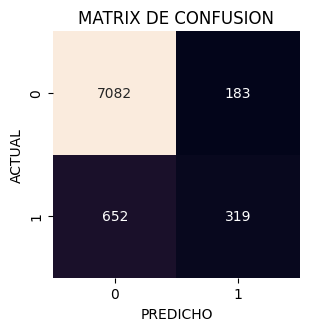

In [140]:
print("------CONSTRUIMOS UNA MATRIZ DE CONFUSION------")
banco_mc = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(banco_mc)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.xlabel('PREDICHO')
plt.ylabel('ACTUAL')
plt.title('MATRIX DE CONFUSION')
plt.show()

In [ ]:
print("-------OBTIMIZAMOS LOS PARAMETROS--------\n")
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


-------OBTIMIZAMOS LOS RESULTADOS--------



In [134]:
print("-------DEFINIMOS PARAMETROS QUE QUEREMOS AJUSTAR A MANO-------\n")
# Definimos los parámetros que queremos ajustar a mano
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "max_iter": [100, 200, 300],
    "tol": [1e-4, 1e-3, 1e-2],
    
}

# Inicializamos la cuadrícula
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

-------DEFINIMOS PARAMETROS QUE QUEREMOS AJUSTAR A MANO-------



GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='accuracy')

In [135]:
# ACA SE ESTABLECEN LOS MEJORES PARAMETROS QUE SE PUEDEN AJUSTAR
grid.fit(X_train_final, y_train)

print(f"ESTOS SON LOS MEJORES PARAMETROS A AJUSTAR: {grid.best_params_}")


ESTOS SON LOS MEJORES PARAMETROS A AJUSTAR: {'C': 10, 'max_iter': 200, 'penalty': None, 'solver': 'sag', 'tol': 0.01}


In [ ]:
print("PRIMERA BUSQUEDA EN CUADRICULA (GRID SEARCH)")
model_grid = LogisticRegression(penalty = None, C = 10, solver = "sag", max_iter=200, tol=0.01)
model_grid.fit(X_train_final, y_train)
y_pred = model_grid.predict(X_test_final)


grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy = grid_accuracy * 100

print(f"UTILIZANDO OPTIMIZACION DE PARAMETROS GRID ARROJA UN VALOR DE {grid_accuracy}")

BUSQUEDA EN CUADRICULA (GRID SEARCH)
UTILIZANDO OPTIMIZACION DE PARAMETROS GRID ARROJA UN VALOR DE 89.86158329286062


In [146]:
# Definimos los parámetros que queremos ajustar
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    'max_iter': [100, 200, 300], 
    'tol': [1e-4, 1e-3, 1e-2], 
    'class_weight': [None, 'balanced'], 
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Inicializamos la búsqueda aleatoria
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'class_weight': [None, 'balanced'],
                                        'l1_ratio': [0.1, 0.5, 0.9],
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag', 'saga'],
                                        'tol': [0.0001, 0.001, 0.01]},
                   random_state=42, scoring='accuracy')

In [148]:
# REALIZAMOS BUSQUEDA ALEATORIA DE HIPERPARAMETROS

random_search.fit(X_train_final, y_train)

print(f"LOS MEJORES HIPERPARAMETROS DE MODO ALEATORIO SON: {random_search.best_params_}")

LOS MEJORES HIPERPARAMETROS DE MODO ALEATORIO SON: {'tol': 0.001, 'solver': 'sag', 'penalty': None, 'max_iter': 300, 'l1_ratio': 0.9, 'class_weight': None, 'C': np.float64(0.0006951927961775605)}


In [149]:
model_random_search = LogisticRegression(tol= 0.001, solver= 'sag', penalty= None, max_iter= 300, l1_ratio= 0.9, class_weight= None, C= np.float64(0.0006951927961775605))
model_random_search.fit(X_train_final, y_train)
y_pred = model_random_search.predict(X_test_final)

random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy = random_search_accuracy * 100
print(f"UTILIZANDO OPTIMIZACION DE PARAMETROS ARROJA UN VALOR DE {random_search_accuracy}")

UTILIZANDO OPTIMIZACION DE PARAMETROS ARROJA UN VALOR DE 89.87372510927635


REALIZA UN NIVEL DE PRECISION IGUAL QUE EL ANTERIOR COLOCANDOLE MAS PARAMETROS QUE LOS DEL NOTEBOOK